# 1Pandas疫情探索性分析

## 1.1 使用apply函数，探索1960-2014美国犯罪数据

### 1.1.1将数据命名为crime

In [44]:
import pandas as pd
import numpy as np
crime = pd.read_csv('../data/US_Crime_Rates_1960_2014.csv')
crime.head(2)

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000


### 1.1.2 查看每一列的数据类型

In [45]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
Unnamed: 0            55 non-null int64
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(13)
memory usage: 5.7 KB


### 1.1.3 将Year的数据类型转化为datetime格式

In [46]:
crime["Year"] = pd.to_datetime(crime['Year'],format='%Y')
crime.head(3)

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


### 1.1.4 将Year设置为索引列 

In [47]:
# crime.set_index('Year',inplace=True)
crime.head(5)

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 1.1.5 删除Total列 

In [48]:
# crime.drop(labels='Unnamed: 0',axis=1,inplace=True)
# crime.drop(labels='Total',axis=1,inplace=True)
crime.head(5)

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 1.1.6 按照Year（每十年）对数据进行分组求和

In [49]:
# W 星期
# M 月
# Q 季度
# QA 季度开始的第一天
# A 年
# AS 按年聚合的第一天
#crime.resample("10AS").sum()
crime.head(3)

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


### 1.1.7 什么时候美国历史上生存最危险的年代 

### 1.2 股价数据

In [50]:
apple =pd.read_csv("../data/appl_1980_2014.csv")
apple.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [51]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


In [52]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [53]:
apple.set_index("Date",inplace=True)
apple.head(3)


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


In [54]:
apple.index.shape == apple.index.unique().shape # 判断是否有重复

True

In [55]:
apple = apple.sort_index() # 根据Date排序
apple.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [56]:
# 找到每月最后一个交易日
mid = apple.groupby(by=[apple.index.year,apple.index.month]).agg(lambda x :x.index.max())
mid.iloc[:,0].head()

Date  Date
1980  12     1980-12-31
1981  1      1981-01-30
      2      1981-02-27
      3      1981-03-31
      4      1981-04-30
Name: Open, dtype: datetime64[ns]

In [57]:
# 数据中最早的日期和最晚的日期相差多少天
(apple.index.max()-apple.index.min()).days

12261

In [58]:
# 数据中一共有多少月
mid.shape[0]

404

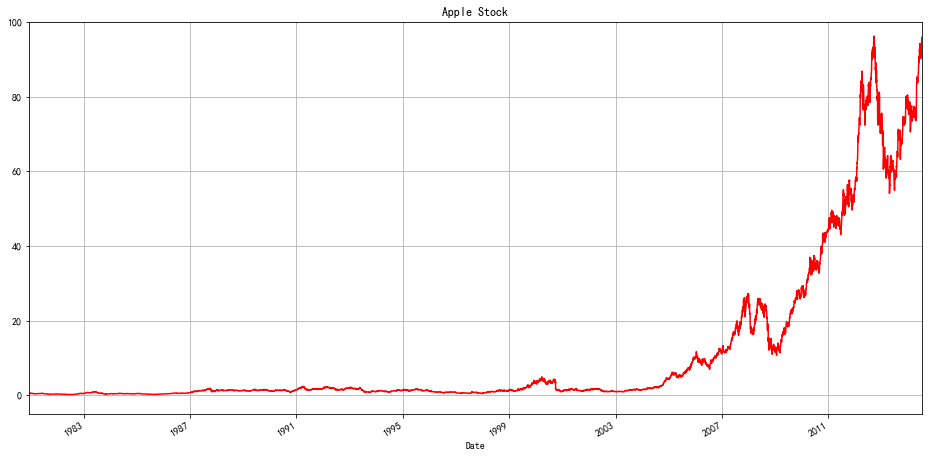

In [59]:
# 按照时间序列做可视化
import matplotlib.pyplot as plt
apple_open = apple['Adj Close'].plot(color='red',title = 'Apple Stock')
fig = apple_open.get_figure()
fig.set_size_inches(16,8)
plt.grid()
plt.ylim(-5,100)
plt.show()

## 全国历史数据分析 

In [60]:
alltime_china = pd.read_csv('../covid_data/alltime_China_2020_04_27.csv')
# alltime_china

In [61]:
alltime_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 15 columns):
date                  98 non-null object
lastUpdateTime        0 non-null float64
total_confirm         98 non-null int64
total_suspect         98 non-null int64
total_heal            98 non-null int64
total_dead            98 non-null int64
total_severe          98 non-null int64
total_input           98 non-null int64
today_confirm         98 non-null int64
today_suspect         98 non-null int64
today_heal            98 non-null int64
today_dead            98 non-null int64
today_severe          98 non-null int64
today_storeConfirm    0 non-null float64
today_input           54 non-null float64
dtypes: float64(3), int64(11), object(1)
memory usage: 11.6+ KB


In [62]:
name_dict = {'date':"日期",'id':"编号", 'name':'名称', 'lastUpdateTime':'更新时间', 'total_confirm':'累计确诊', 'total_suspect':'累计疑似',
       'total_heal':'累计治愈', 'total_dead':'累计死亡', 'total_severe':'累计重症', 'total_input':'累计输入',
       'total_newConfirm':'累计新增确诊', 'total_newDead':'累计新增死亡', 'total_newHeal':'累计新增治愈', 'today_confirm':'当日新增确诊',
       'today_suspect':'当日新增疑似', 'today_heal':'当日新增治愈', 'today_dead':'当日新增死亡', 'today_severe':'当日新增疑似',
       'today_storeConfirm':'当日现存确诊', 'today_input':'当日新增输入'}

In [63]:
alltime_china.rename(columns=name_dict,inplace=True)

In [64]:
# alltime_china.head(5)

In [65]:
# 计算当日现存确诊
alltime_china["当日现存确诊"] = alltime_china['累计确诊'] - alltime_china['累计死亡']-alltime_china['累计治愈']
# alltime_china.head(5)

In [66]:
# 删除更新时间、累计输入、当日新增输入
# 多列删除
alltime_china.drop(['更新时间','累计输入','当日新增输入'],axis=1,inplace=True)
# alltime_china.drop(['当日新增疑似'],axis=1,inplace=True)

In [67]:
alltime_china.head()

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增疑似,当日现存确诊
0,2020-01-20,291,54,25,6,0,291,27,25,6,0,260
1,2020-01-21,440,37,25,9,102,149,26,-25,3,0,406
2,2020-01-22,571,393,28,17,95,131,257,28,8,0,526
3,2020-01-23,830,1072,34,25,177,259,680,6,8,0,771
4,2020-01-24,1287,1965,38,41,237,444,1118,4,16,0,1208


In [68]:
# 单列删除
#alltime_china.drop(['当日新增疑似'],axis=1,inplace=True)
#alltime_china.drop(labels='更新时间',axis=1,inplace=True)

In [69]:
#将日期设置为索引
alltime_china.set_index('日期',inplace=True)

In [70]:
alltime_china.index

Index(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',

In [71]:
#拿到2020年2月-4月数据
alltime_china.loc['2020-02':'2020-04']

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增疑似,当日现存确诊
日期,,,,,,,,,,,
2020-02-01,14380,19544,328,304,2110,2589,4562,85,45,0,13748
2020-02-02,17205,21558,475,361,2296,2825,5173,147,57,0,16369
2020-02-03,20438,23214,632,425,2788,3233,5072,157,64,0,19381
2020-02-04,24324,23260,892,490,3219,3886,3971,260,65,0,22942
2020-02-05,28018,24702,1153,563,3859,3694,5328,261,73,0,26302
2020-02-06,31161,26359,1540,636,4821,3193,4833,387,73,0,28985
2020-02-07,34546,27657,2050,722,6101,3437,4214,510,86,0,31774
2020-02-08,37198,28942,2649,811,6188,2652,3916,599,89,0,33738
2020-02-09,40171,23589,3281,908,6484,2973,4008,632,97,0,35982


### 绘制疫情数据变化趋势情况

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime
plt.rcParams['font.sans-serif'] = 'SimHei'

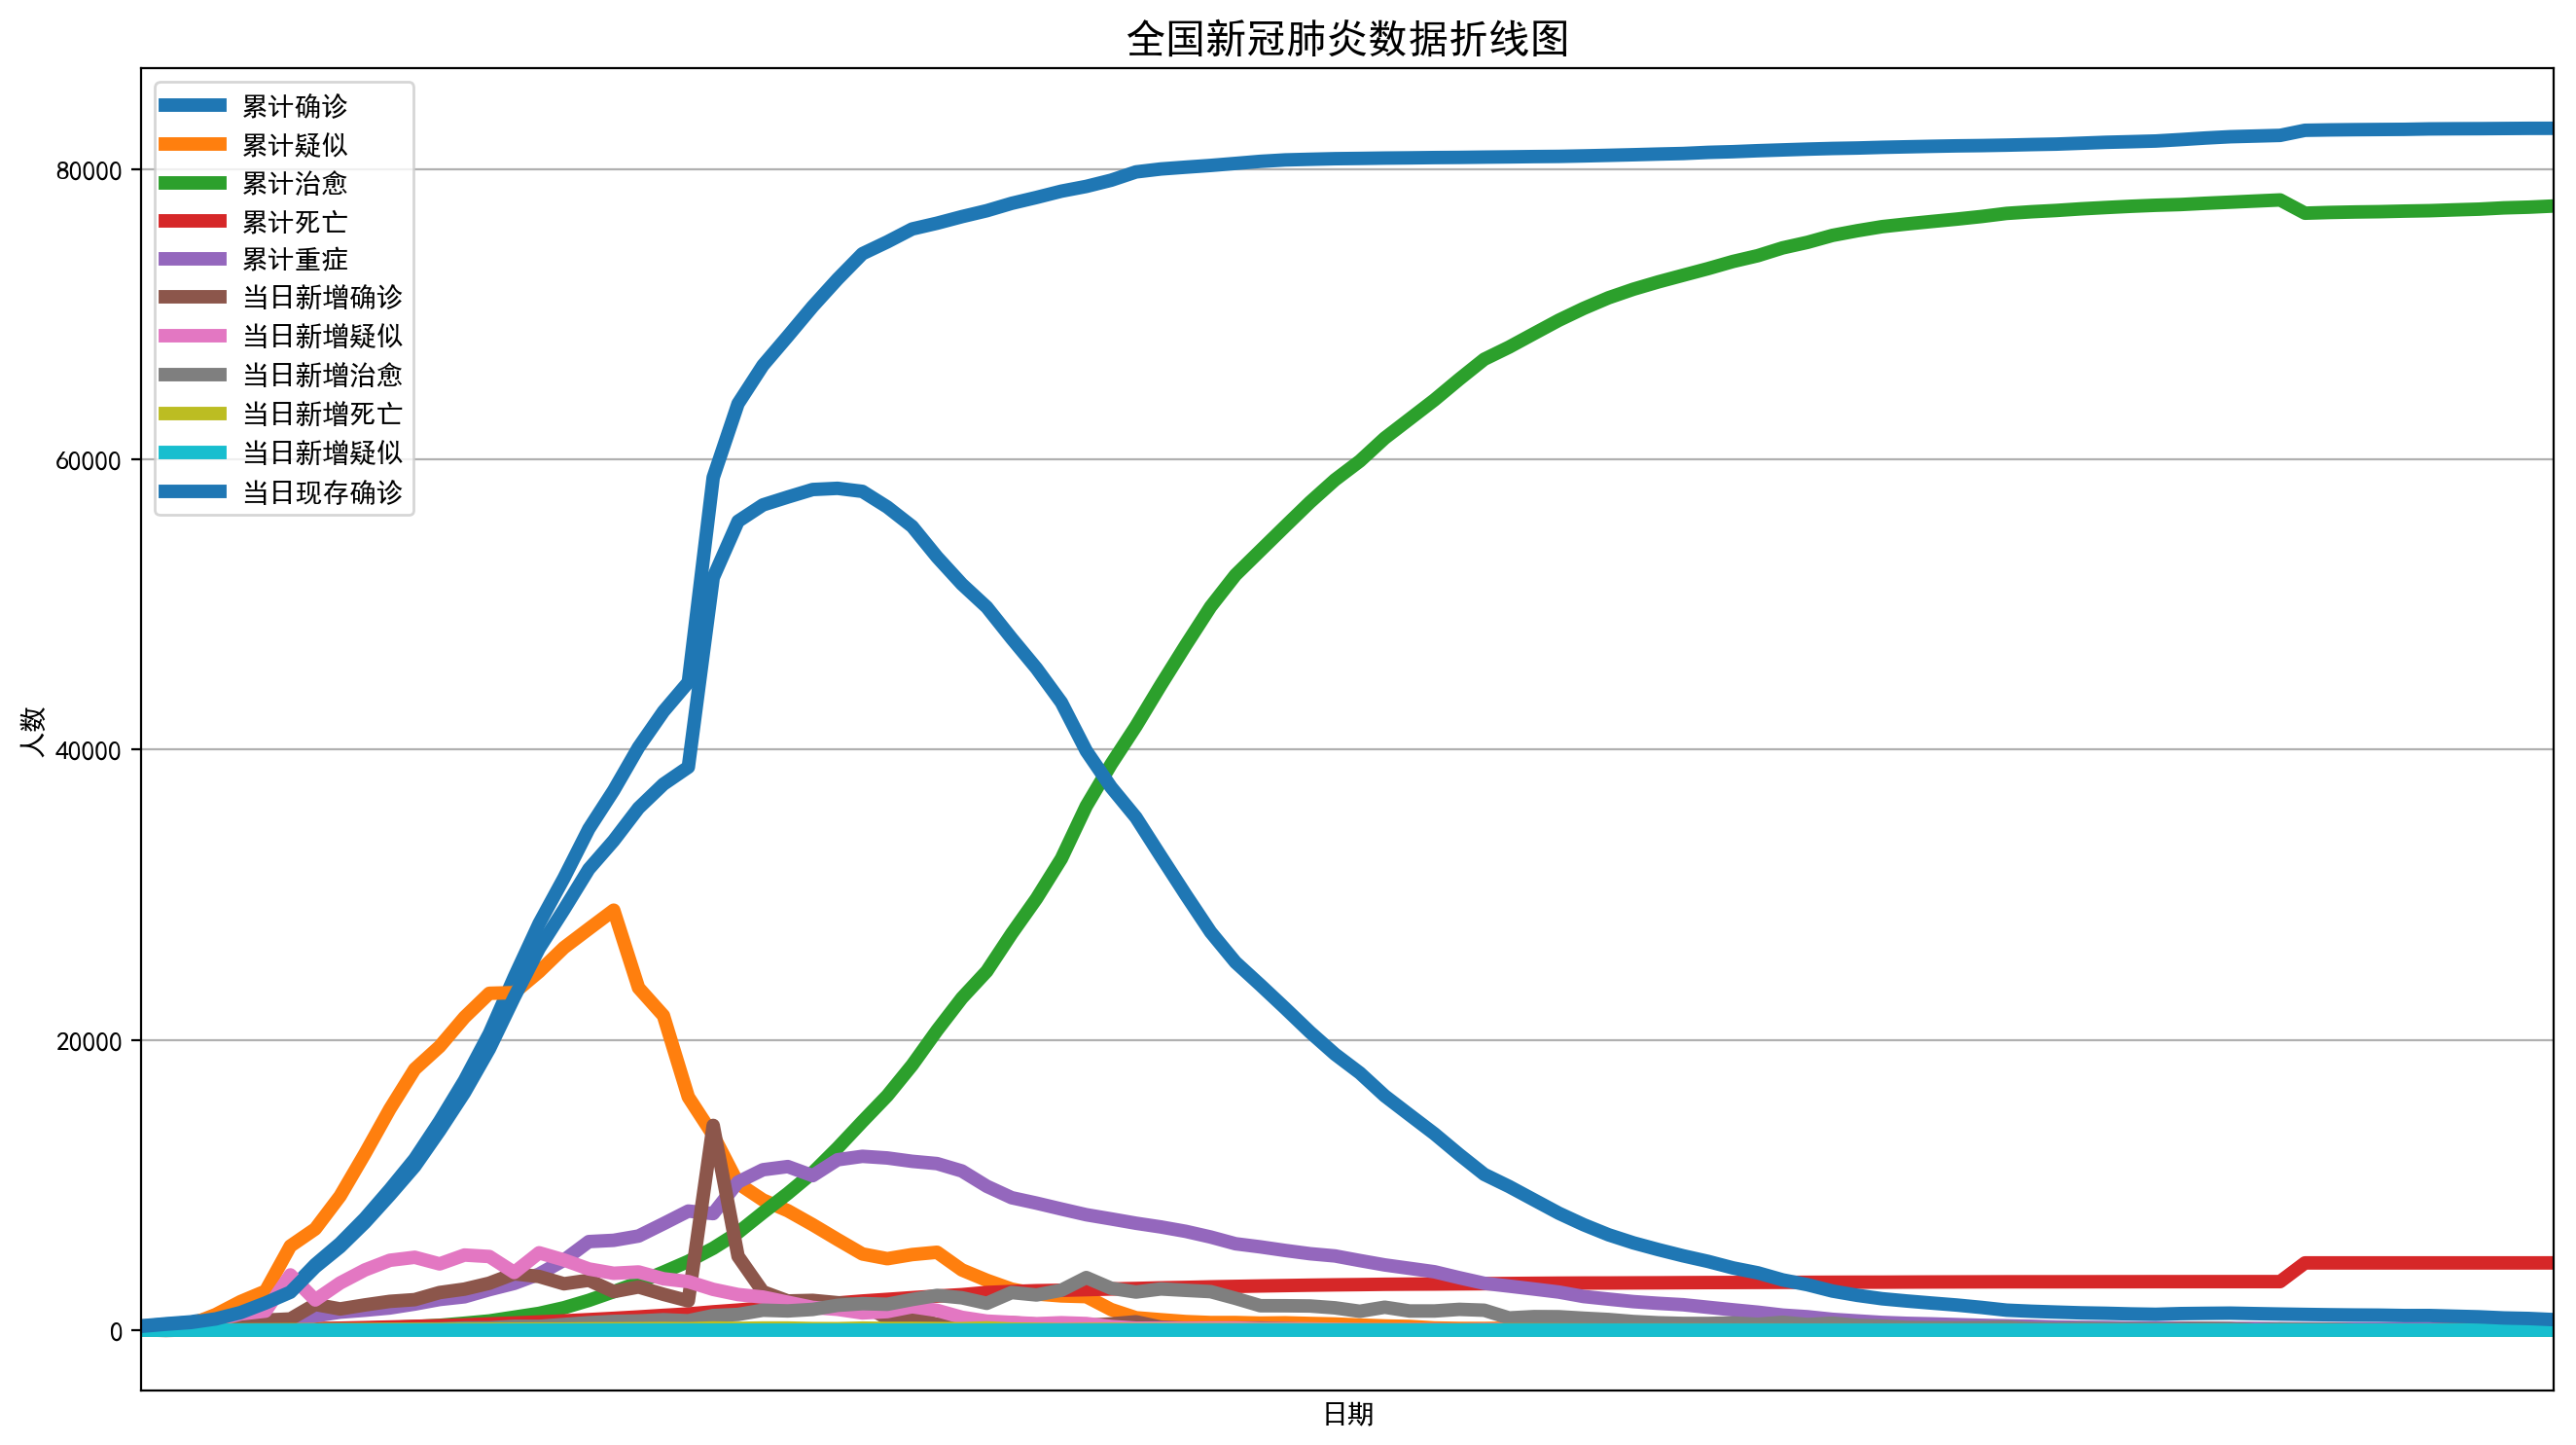

In [141]:
fig,ax = plt.subplots(figsize=(16,9),dpi=200)

alltime_china.plot(marker='o',markersize=1,linewidth=5,ax=ax,use_index=True)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d'))

plt.ylabel('人数')
plt.title('全国新冠肺炎数据折线图',fontsize=15)
plt.grid(axis='y')
plt.savefig('全国新冠肺炎数据折线图.png',dpi=500)
plt.show()

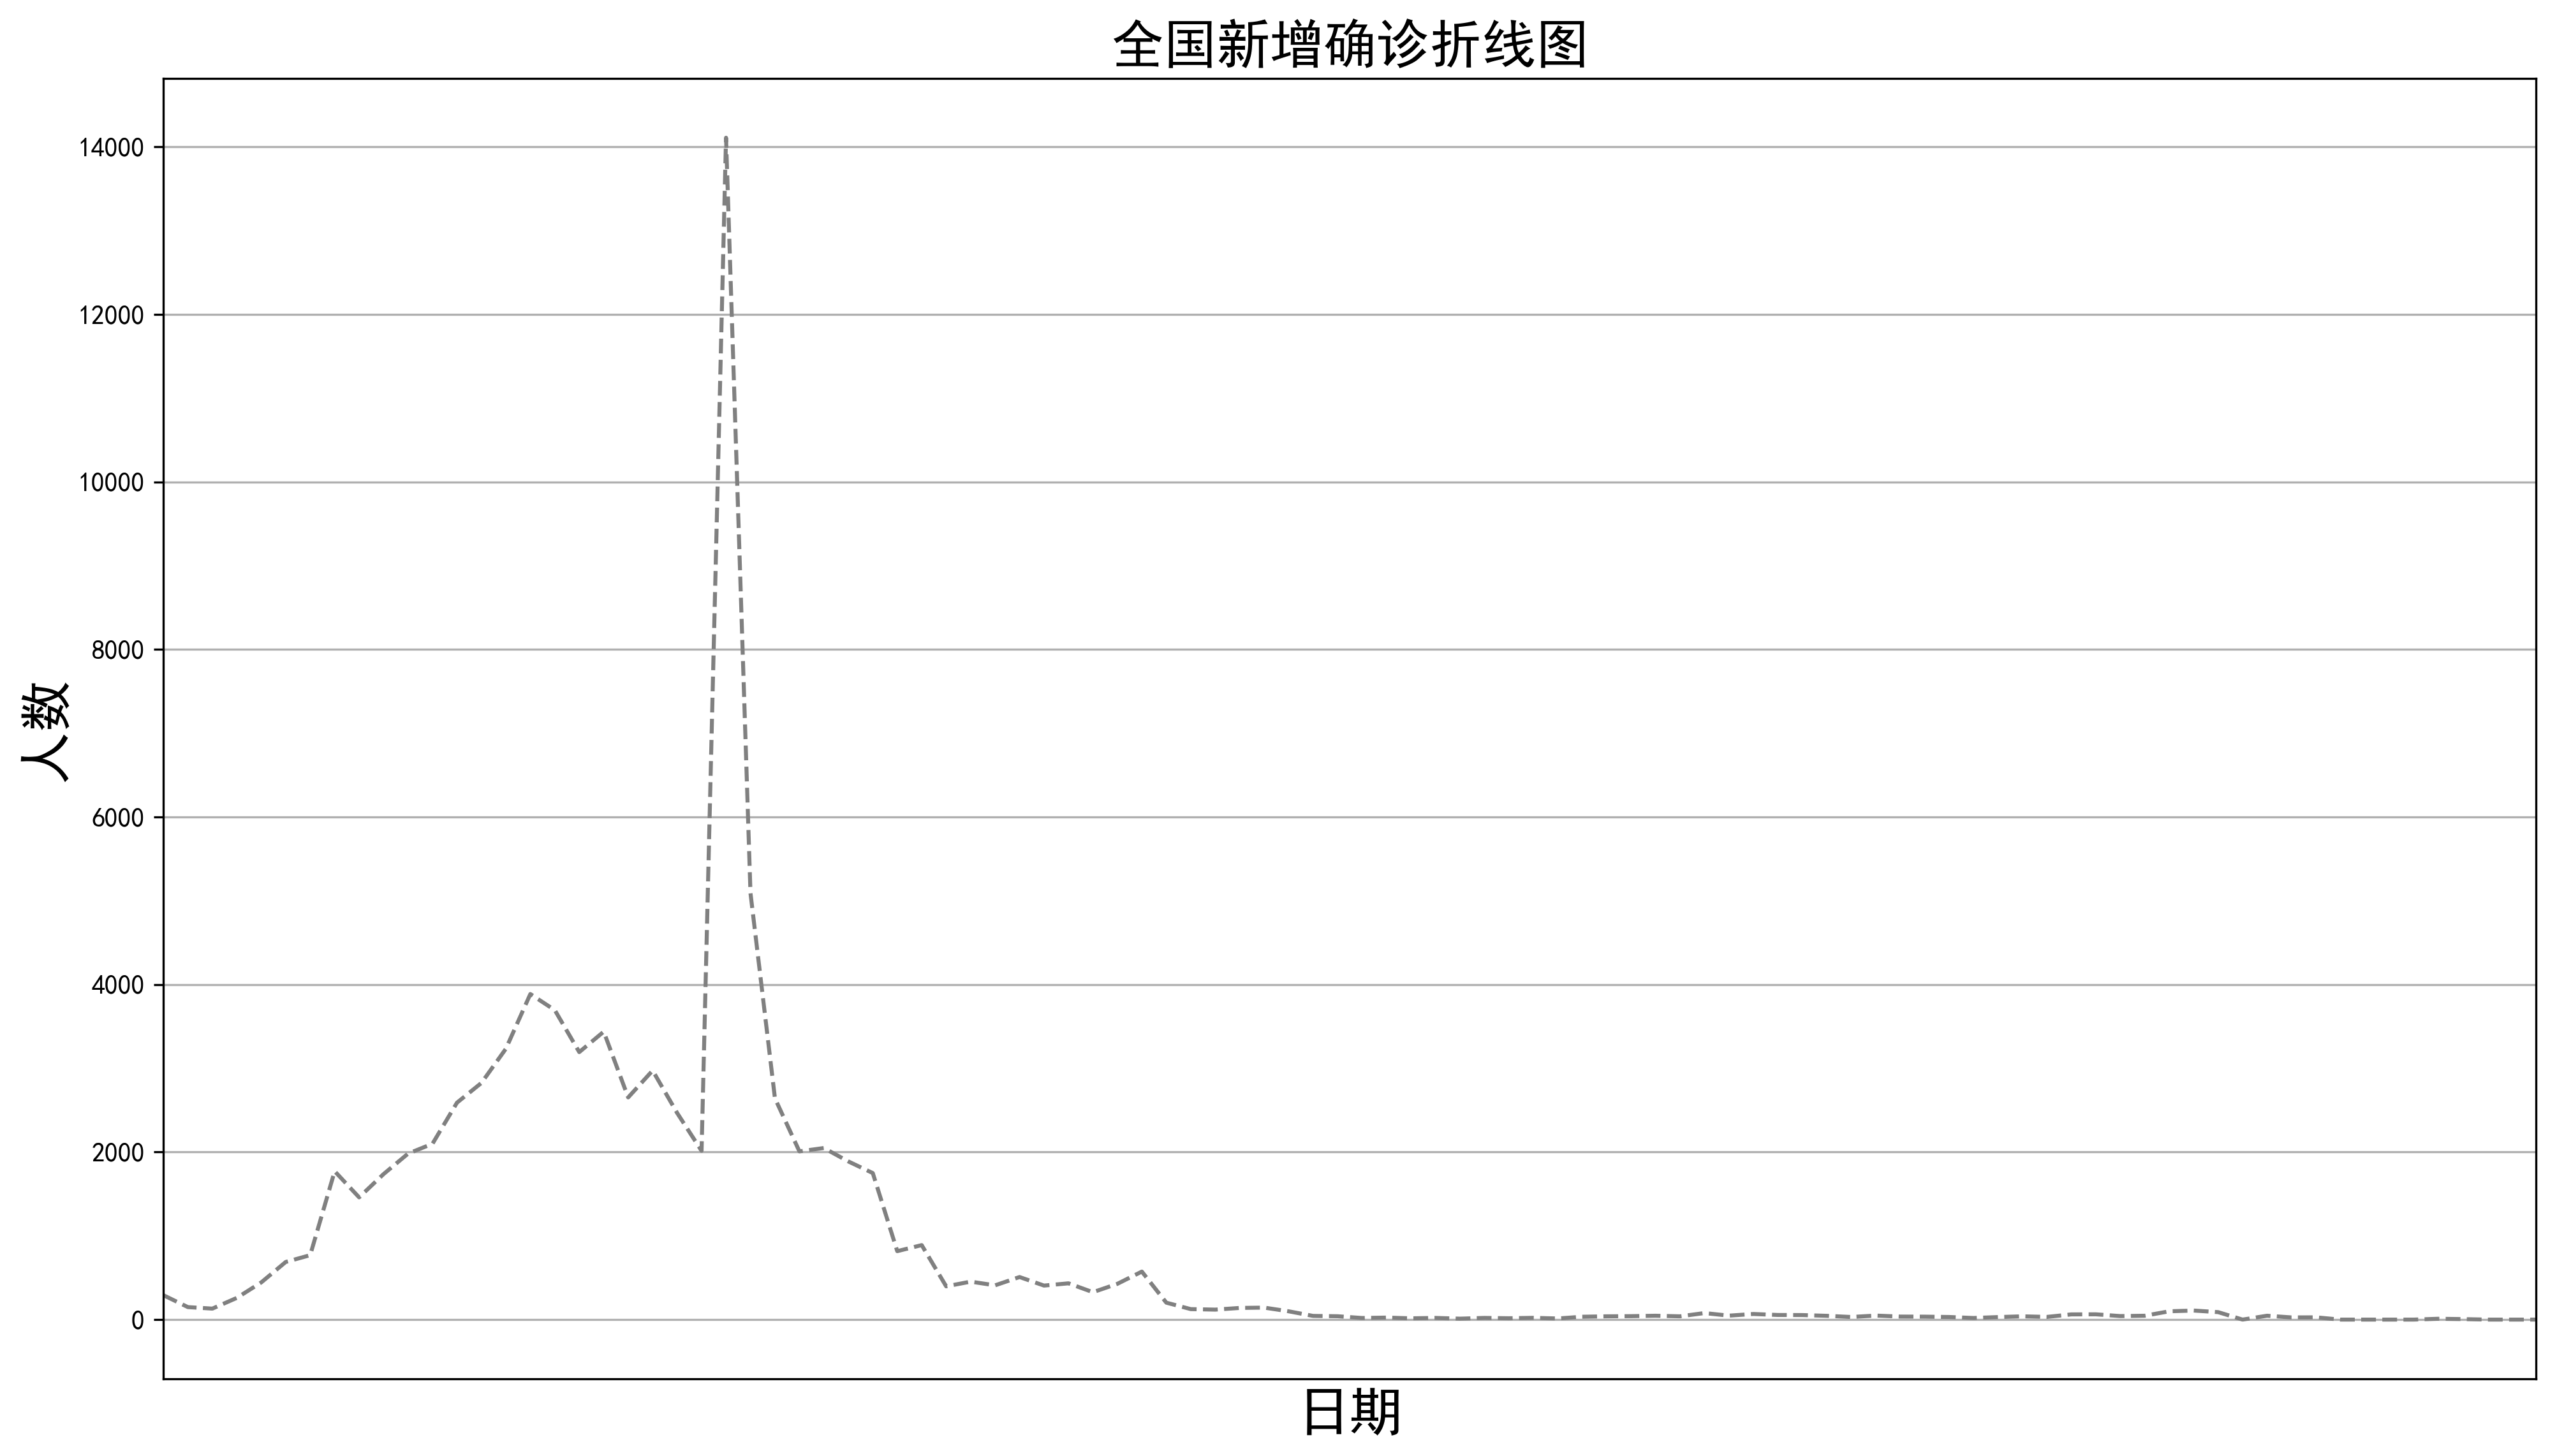

In [140]:
#全国新增病例折线图
fig,ax=plt.subplots(figsize=(16,9),dpi=300)
alltime_china['当日新增确诊'].plot(linestyle='--',ax=ax,color='grey')

ax.xaxis.set_major_locator(dates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%d'))

plt.title('全国新增确诊折线图',fontsize=20,color='k')
plt.xlabel('日期',fontsize=20,color='k')
plt.ylabel('人数',fontsize=20,color='k')
plt.grid(b=True)
plt.savefig('全国新增确诊折线图.png',dpi=500)
plt.show()


### https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py